<a href="https://colab.research.google.com/github/vrindasheela/firstfile/blob/master/EcommerceRecommenderSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Defining the path for train and test images

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.gridspec import GridSpec
import missingno as msno
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
import string
import sys
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.sparse import csr_matrix
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import time
import sys
import math
import itertools
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import folium
from folium.plugins import Fullscreen
import json
from wordcloud import WordCloud
import warnings
import plotly.graph_objects as go
from plotly.offline import iplot
from sklearn.metrics import accuracy_score
import xgboost as xgbc
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')

Step 2: Exploratory DATA Analysis


In [3]:
reviews = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sample30.csv', encoding='latin-1')
reviews.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [4]:
reviews.shape

(30000, 15)

In [5]:
reviews.dtypes

id                      object
brand                   object
categories              object
manufacturer            object
name                    object
reviews_date            object
reviews_didPurchase     object
reviews_doRecommend     object
reviews_rating           int64
reviews_text            object
reviews_title           object
reviews_userCity        object
reviews_userProvince    object
reviews_username        object
user_sentiment          object
dtype: object

In [6]:
reviews.isnull().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

**Words most used in the reviews**

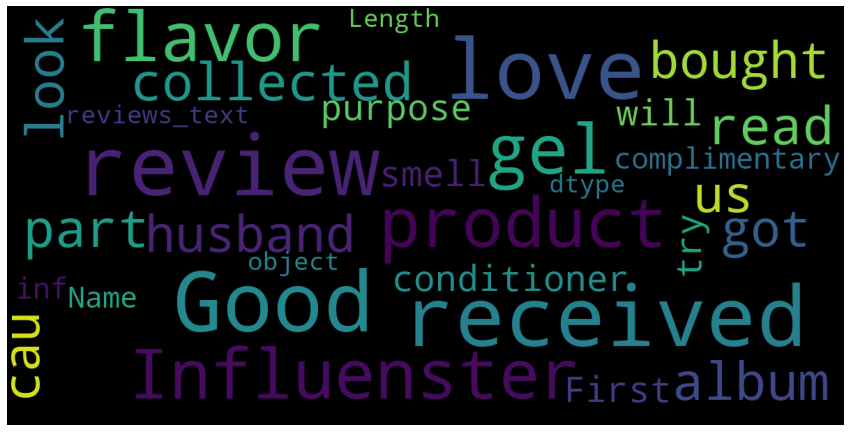

In [7]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(reviews['reviews_text'])

**Maximum number of ratings given**

In [8]:
ratings = reviews['reviews_rating'].value_counts().head()
trace = go.Bar(
    y=ratings.index[::-1],
    x=ratings.values[::-1],
    orientation = 'h',
    marker=dict(
        color=ratings.values[::-1],
        colorscale = 'Greens',
        reversescale = True
    ),
)

layout = dict(
    title='Ratings Pattern',
    )
data = [trace]
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename="Ratings")

**Length of reviews and their ratings - comparison**

In [9]:
reviews['reviews_length']=reviews['reviews_text'].apply(len)

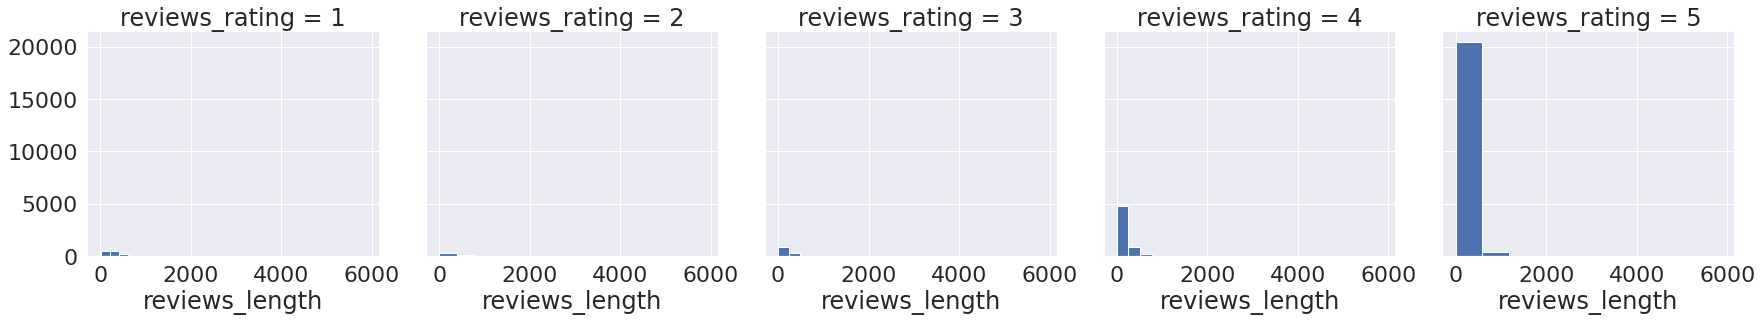

In [10]:
sns.set(font_scale=2.0)

grid_rev_rat_map = sns.FacetGrid(reviews,col='reviews_rating',size=5)
grid_rev_rat_map.map(plt.hist,'reviews_length')

In [11]:
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer

all_text=reviews['reviews_text']
train_text=reviews['reviews_text']
y=reviews['reviews_rating']

**TFIDF Vectorizer**

In [12]:
word_vec = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=10000)
word_vec.fit(all_text)
train_word_features = word_vec.transform(train_text)

In [13]:
char_vec = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    stop_words='english',
    ngram_range=(2, 6),
    max_features=50000)
char_vec.fit(all_text)
train_charac_features = char_vec.transform(train_text)

train_features = hstack([train_charac_features, train_word_features])

**Splitting into training and testing data**

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_features, y,test_size=0.3,random_state=101)

**Random Forest Classifier**

In [15]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)
preds=classifier.predict(X_test)

**XGBoost Classifier**

In [16]:
xgbc = xgbc.XGBClassifier()

In [17]:
xgbc.fit(X_train,y_train)
preds_xgbc = xgbc.predict(X_test)

**Logistic Regression**

In [18]:

lrc = LogisticRegression()
lrc.fit(X_train,y_train)
preds_lrc=lrc.predict(X_test)

**Accuracy of all the three models**

In [19]:
rfc_acc = accuracy_score(preds,y_test)
xgbc_acc=accuracy_score(preds_xgbc,y_test)
lrc_acc=accuracy_score(preds_lrc,y_test)

print("Random Forest Model accuracy",rfc_acc)
print("XGBoost Model accuracy",xgbc_acc)
print("Logistic Regression Model accuracy",lrc_acc)

Random Forest Model accuracy 0.7585555555555555
XGBoost Model accuracy 0.7428888888888889
Logistic Regression Model accuracy 0.7511111111111111


**We see highest accuracy is for Random Forest Model**